In [1]:
import sacc
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2 as chi2f

In [2]:
def get_stats(d, cov, verbose=True):
    chi2 = np.dot(d, np.linalg.solve(cov, d))
    ndof = len(d)
    sn = np.sign(chi2-ndof)*np.sqrt(np.fabs(chi2-ndof))
    p = 1-chi2f.cdf(chi2, ndof)
    if verbose:
        print(f" - chi2 = {chi2}")
        print(f" - ndof = {ndof}")
        print(f" - S/N  = {sn}")
        print(f" - PTE  = {p}")
    return chi2, ndof, sn, p

### 1. Get stats per redshift bin and in total

In [3]:
for igal in range(6):
    s1 = sacc.Sacc.load_fits("../../fermi_x_galaxies.fits")
    s1.remove_selection(ell__gt=2048)
    s1.remove_selection(ell__lt=30)
    s1.keep_tracers([f'gal{igal}'] + [f'gam{igam}' for igam in range(12)])
    print(f"z-bin {igal}")
    get_stats(s1.mean, s1.covariance.covmat)
for igam in range(12):
    s1 = sacc.Sacc.load_fits("../../fermi_x_galaxies.fits")
    s1.remove_selection(ell__gt=2048)
    s1.remove_selection(ell__lt=30)
    s1.keep_tracers([f'gal{igal}' for igal in range(6)] + [f'gam{igam}'])
    print(f"E-bin {igam}")
    get_stats(s1.mean, s1.covariance.covmat)
s1 = sacc.Sacc.load_fits("../../fermi_x_galaxies.fits")
s1.remove_selection(ell__gt=2048)
s1.remove_selection(ell__lt=30)
print("Total")
a = get_stats(s1.mean, s1.covariance.covmat)


z-bin 0
 - chi2 = 238.76900186110322
 - ndof = 288
 - S/N  = -7.0164804666511245
 - PTE  = 0.9843494261575081
z-bin 1
 - chi2 = 248.73170037238586
 - ndof = 288
 - S/N  = -6.266442342159875
 - PTE  = 0.9543875087181071
z-bin 2
 - chi2 = 213.58017888891575
 - ndof = 288
 - S/N  = -8.626692362144615
 - PTE  = 0.9996489591506448
z-bin 3
 - chi2 = 249.0981897127375
 - ndof = 288
 - S/N  = -6.237131575272603
 - PTE  = 0.9527510994758314
z-bin 4
 - chi2 = 268.39290636579375
 - ndof = 288
 - S/N  = -4.427989796081993
 - PTE  = 0.7905501405179869
z-bin 5
 - chi2 = 234.4559432873602
 - ndof = 288
 - S/N  = -7.3173804542773215
 - PTE  = 0.9908200265332667
E-bin 0
 - chi2 = 72.45396819513323
 - ndof = 144
 - S/N  = -8.458488742373946
 - PTE  = 0.9999998946431844
E-bin 1
 - chi2 = 100.44977978711694
 - ndof = 144
 - S/N  = -6.599259065446898
 - PTE  = 0.9977632583032562
E-bin 2
 - chi2 = 97.0479304391233
 - ndof = 144
 - S/N  = -6.852158022176422
 - PTE  = 0.9990369901260574
E-bin 3
 - chi2 = 120.

### 2. Plot all power spectra and their $S/N$

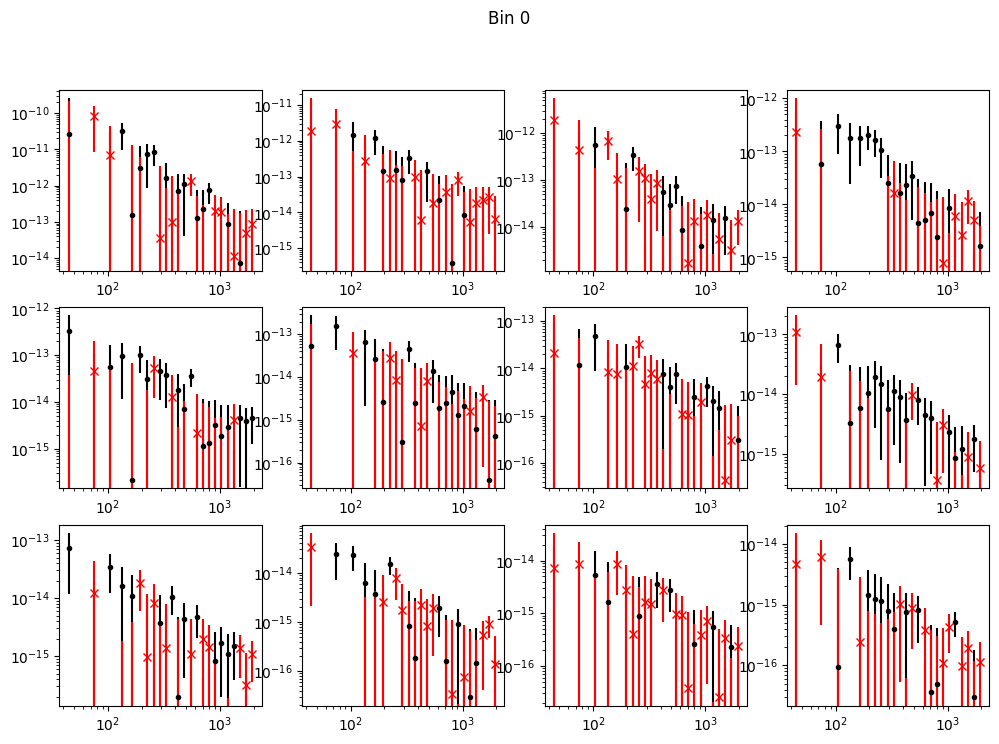

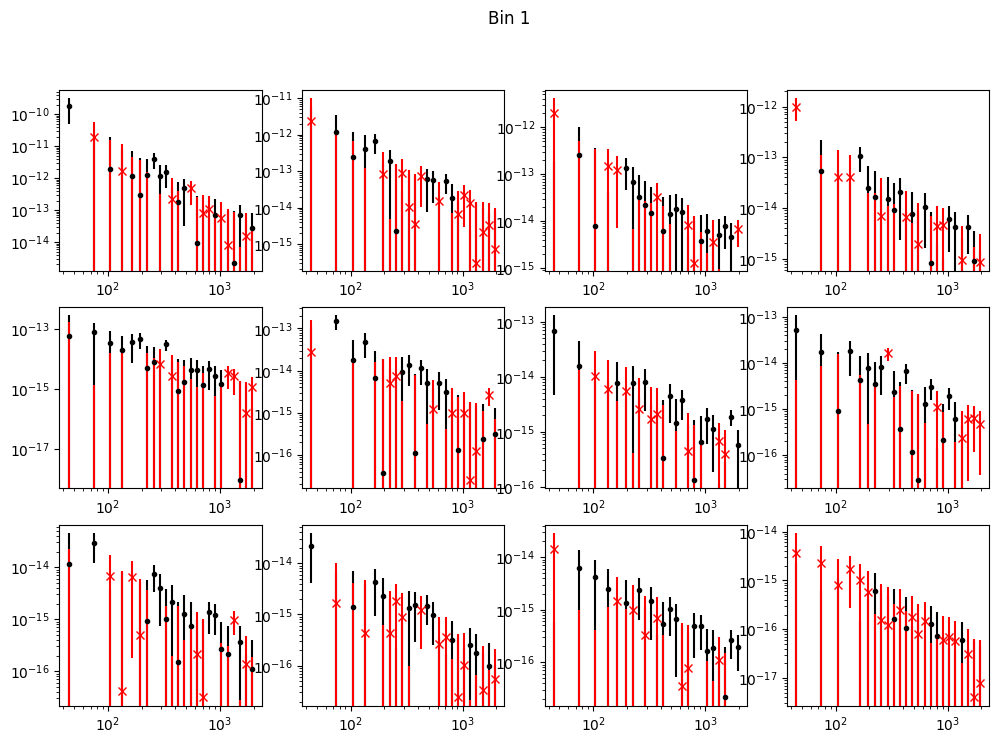

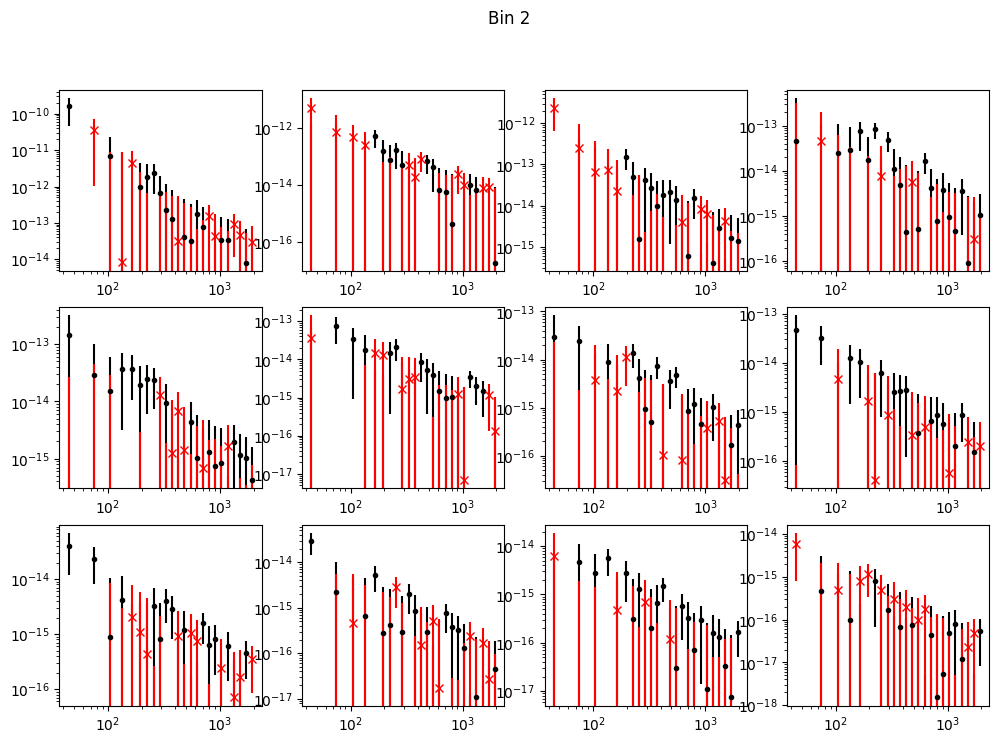

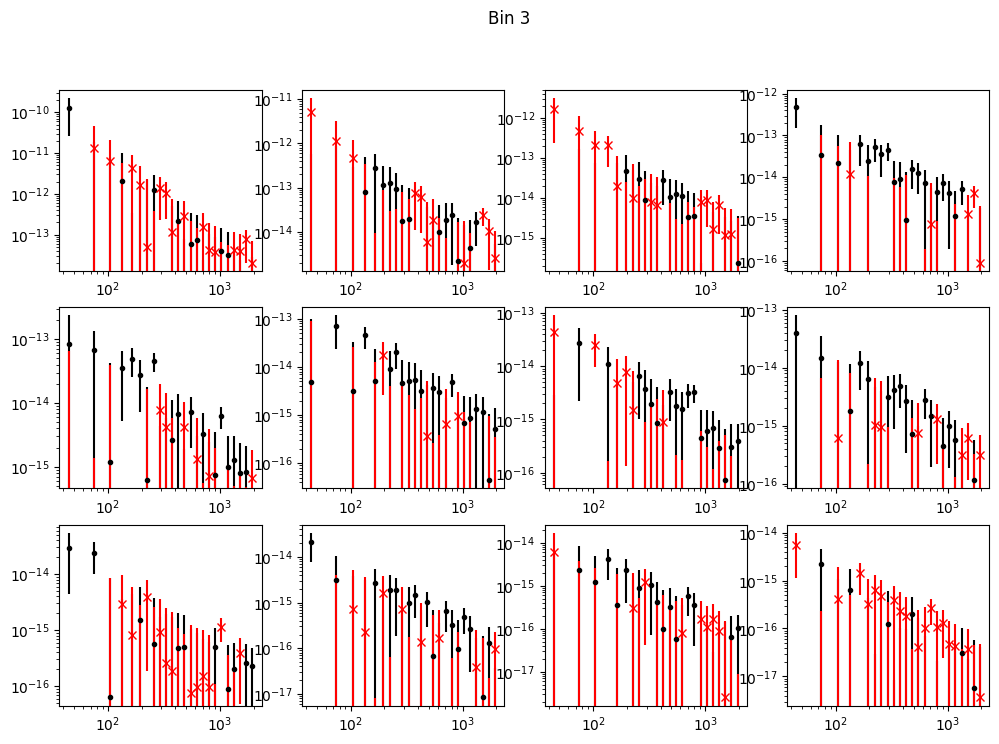

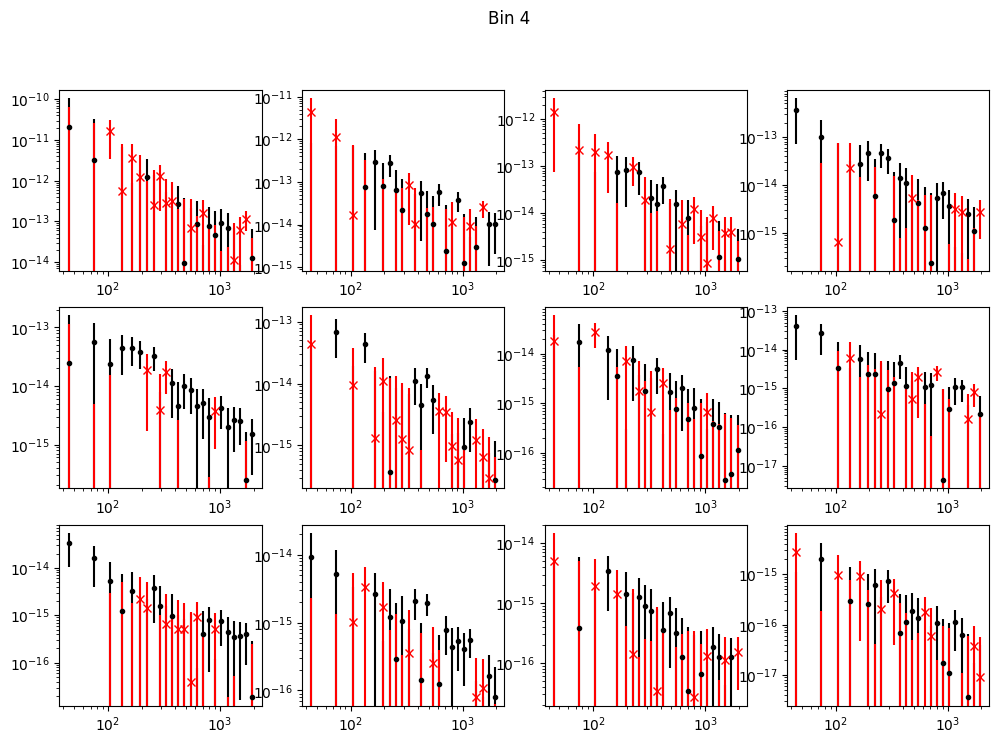

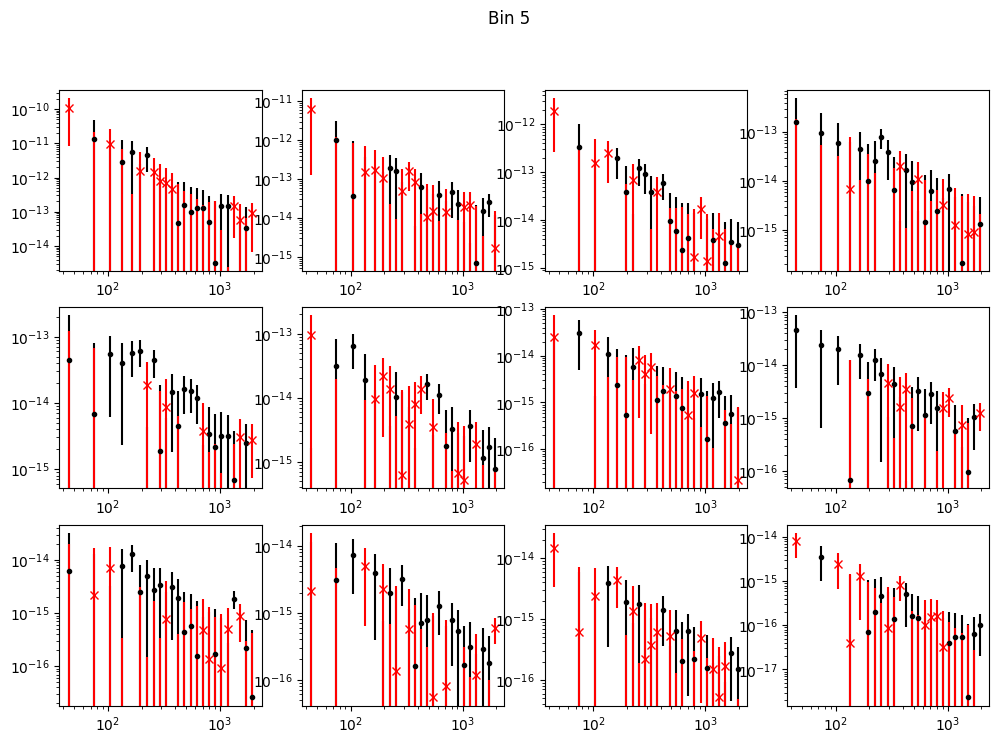

In [4]:
s1 = sacc.Sacc.load_fits("../../fermi_x_galaxies.fits")
s1.remove_selection(ell__gt=2048)
s1.remove_selection(ell__lt=30)

sns = np.zeros([6, 12])
chi2s = np.zeros([6, 12])
ps = np.zeros([6, 12])

for igal in range(6):
    fig, axs = plt.subplots(3, 4, figsize=(12, 8))
    fig.suptitle(f"Bin {igal}")
    axs = axs.flatten()
    for igam in range(12):
        ax = axs[igam]
        ll, cl, cov = s1.get_ell_cl('cl_00', f'gal{igal}', f'gam{igam}', return_cov=True)
        chi2, ndof, sn, p = get_stats(cl, cov, verbose=False)
        sns[igal, igam] = sn
        chi2s[igal, igam] = chi2
        ps[igal, igam] = p
        ax.errorbar(ll, cl, yerr=np.sqrt(np.diag(cov)), fmt='k.')
        ax.errorbar(ll, -cl, yerr=np.sqrt(np.diag(cov)), fmt='rx')
        ax.set_xscale('log')
        ax.set_yscale('log')

### 3. Plot all stats in imshow

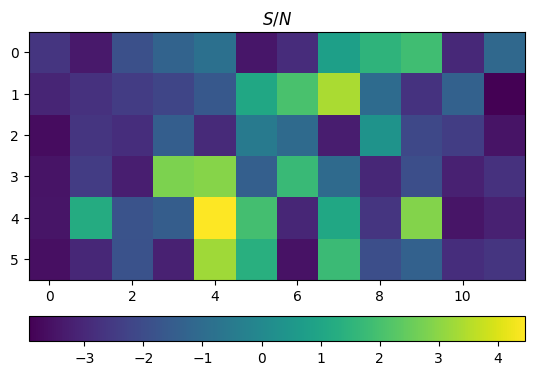

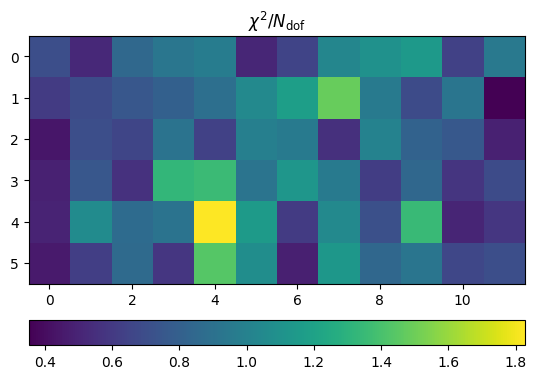

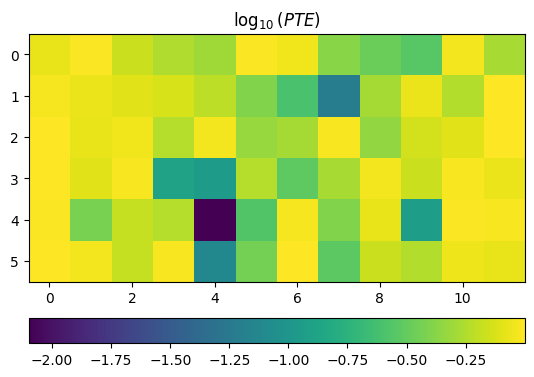

In [5]:
plt.plot()
plt.title('$S/N$')
im = plt.imshow(sns)
plt.colorbar(im, orientation="horizontal", pad=0.1)
plt.figure()
plt.title(r'$\chi^2/N_{\rm dof}$')
im = plt.imshow(chi2s/len(ll))
plt.colorbar(im, orientation="horizontal", pad=0.1)
plt.figure()
plt.title(r'$\log_{10}(PTE)$')
im = plt.imshow(np.log10(ps))
plt.colorbar(im, orientation="horizontal", pad=0.1)